# Summary Shapley Explainer Demo

This example demonstrates how to interpret a **scikit-learn** model using
the H2O Sonar library and retrieve the data and plot the **summary Shapley**.

In [36]:
import logging

import pandas
import webbrowser

from h2o_sonar import interpret
from h2o_sonar.lib.api import commons
from h2o_sonar.lib.api import explainers
from h2o_sonar.lib.api.models import ModelApi
from h2o_sonar.explainers.summary_shap_explainer import SummaryShapleyExplainer

from sklearn.ensemble import GradientBoostingClassifier

In [37]:
results_location = "../../results"

# dataset
dataset_path = "../../data/creditcard.csv"
target_col = "default payment next month"
df = pandas.read_csv(dataset_path)
(X, y) = df.drop(target_col, axis=1), df[target_col]

In [38]:
# parameters
interpret.describe_explainer(SummaryShapleyExplainer)

{'id': 'h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer',
 'name': 'SummaryShapleyExplainer',
 'display_name': 'Shapley Summary Plot for Original Features (Kernel SHAP Method)',
 'description': 'Shapley explanations are a technique with credible theoretical support that presents consistent global and local feature contributions.\n\nThe Shapley Summary Plot shows original features versus their local Shapley values on a sample of the dataset. Feature values are binned by Shapley values and the average normalized feature value for each bin is plotted. The legend corresponds to numeric features and maps to their normalized value - yellow is the lowest value and deep orange is the highest. You can also get a scatter plot of the actual numeric features values versus their corresponding Shapley values. Categorical features are shown in grey and do not provide an actual-value scatter plot.\n\nNotes:\n\n* The Shapley Summary Plot only shows original features that are used in

## Interpretation

h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 30.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 40.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 60.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 60.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 60.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 60.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progres

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 90.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 90.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 90.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 90.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 100.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 100.0%


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

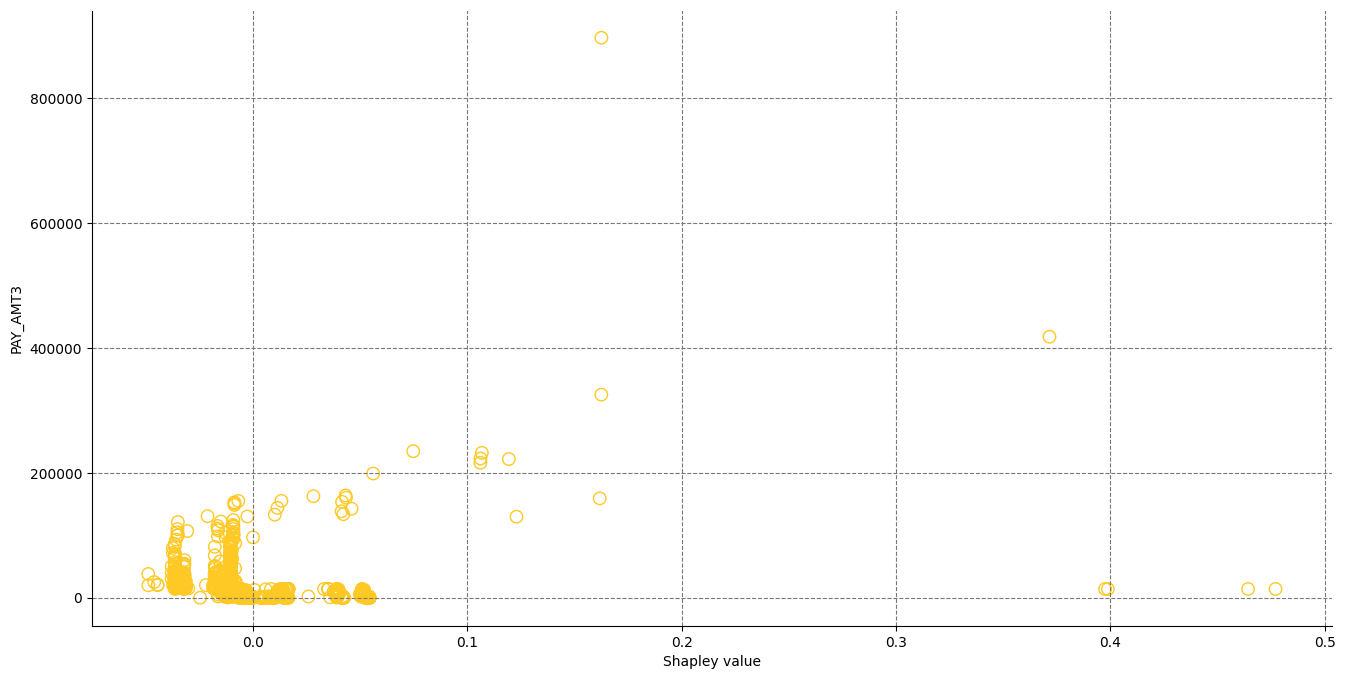

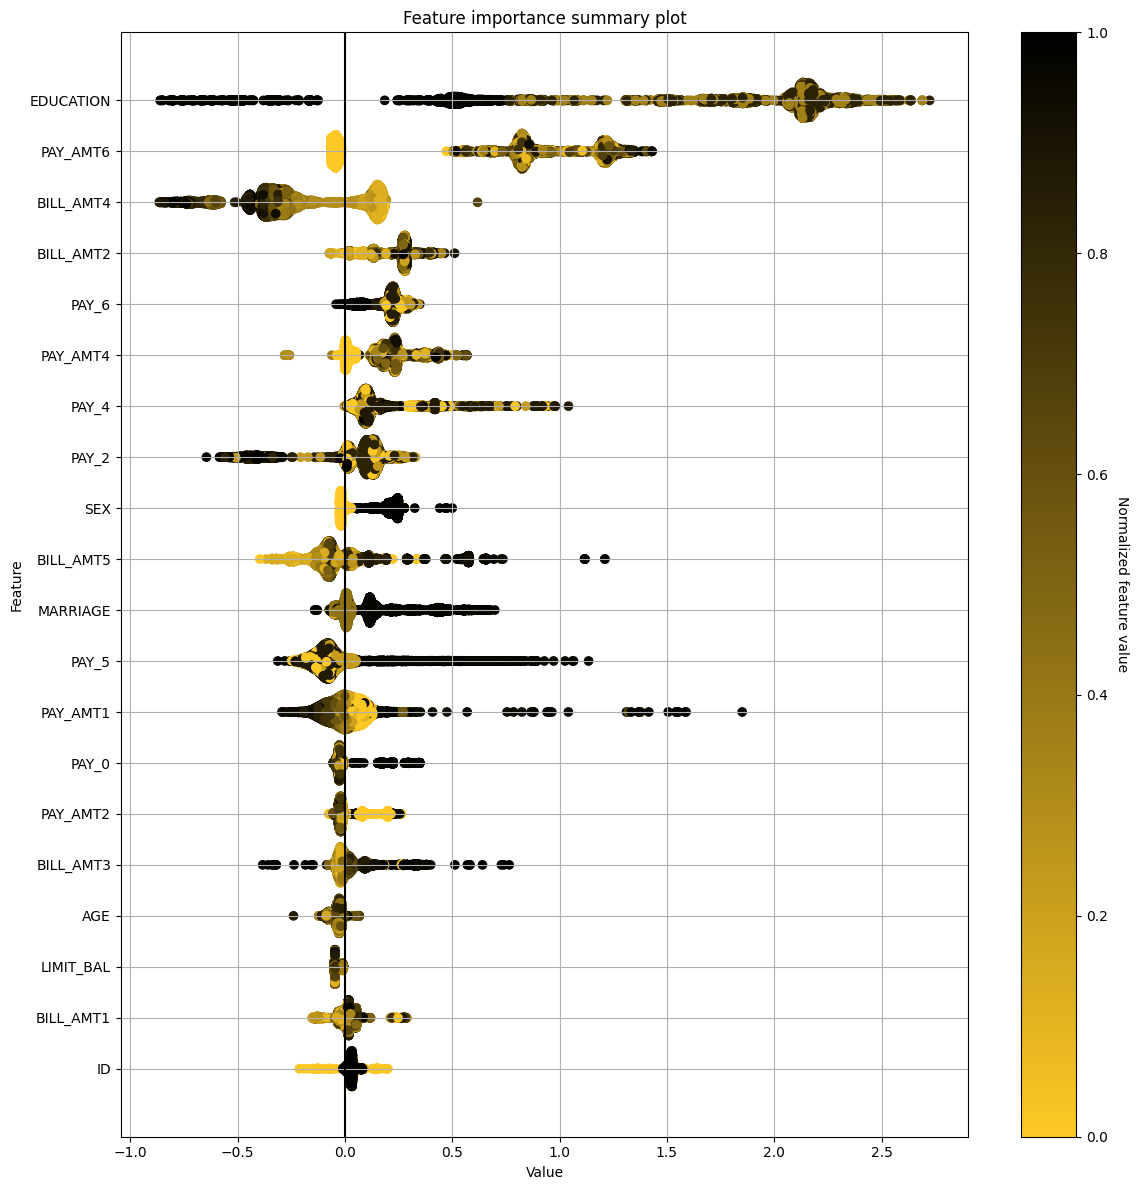

In [39]:
# scikit-learn model
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X, y)

# explainable model
explainable_model = ModelApi().create_model(
    target_col=target_col,
    model_src=gradient_booster,
    used_features=X.columns.to_list()
)

interpretation = interpret.run_interpretation(
    dataset=df,
    model=explainable_model,
    target_col=target_col,
    results_location=results_location,
    log_level=logging.INFO,
    explainers=[
        commons.ExplainerToRun(
            explainer_id=SummaryShapleyExplainer.explainer_id(),
            params="",
        )
    ]
)

## Interact with the Explainer Result

In [40]:
# retrieve the result
result = interpretation.get_explainer_result(SummaryShapleyExplainer.explainer_id())

In [41]:
# open interpretation HTML report in web browser
webbrowser.open(interpretation.result.get_html_report_location())

True

In [42]:
# summary
result.summary()

{'id': 'h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer',
 'name': 'SummaryShapleyExplainer',
 'display_name': 'Shapley Summary Plot for Original Features (Kernel SHAP Method)',
 'description': 'Shapley explanations are a technique with credible theoretical support that presents consistent global and local feature contributions.\n\nThe Shapley Summary Plot shows original features versus their local Shapley values on a sample of the dataset. Feature values are binned by Shapley values and the average normalized feature value for each bin is plotted. The legend corresponds to numeric features and maps to their normalized value - yellow is the lowest value and deep orange is the highest. You can also get a scatter plot of the actual numeric features values versus their corresponding Shapley values. Categorical features are shown in grey and do not provide an actual-value scatter plot.\n\nNotes:\n\n* The Shapley Summary Plot only shows original features that are used in

In [43]:
# parameters
result.params()

{'max_features': 50,
 'sample_size': 20000,
 'x_shapley_resolution': 500,
 'enable_drilldown_charts': True,
 'fast_approx_contribs': True}

### Display the Shapley Shapley

In [44]:
# get the data for all features
result.data()

<Frame#7fa2e844d450 10000x25>

In [45]:
# get the data for only feature "PAY_0"
result.data(feature_names="PAY_0")

<Frame#7fa2b85dfcc0 10000x2>

In [46]:
# get the data for "PAY_0", "AGE and "EDUCATION"
result.data(feature_names=["PAY_0", "AGE", "EDUCATION"])

<Frame#7fa2e8498300 10000x4>

### Plot the Summary Shapley

invalid value encountered in divide


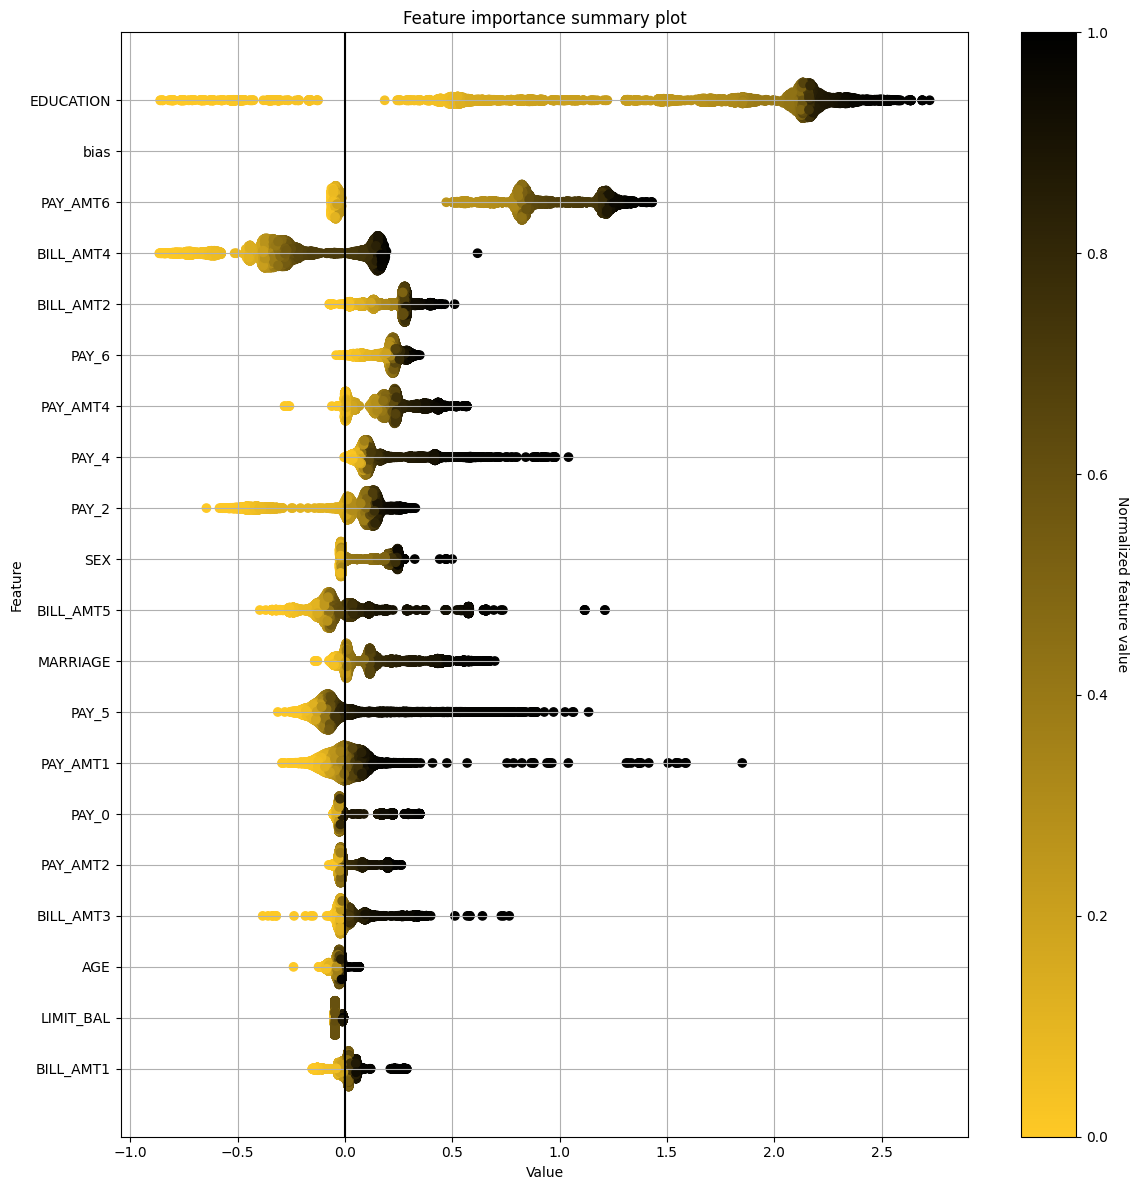

In [47]:
# plot summary shap for all features
result.plot()

invalid value encountered in divide


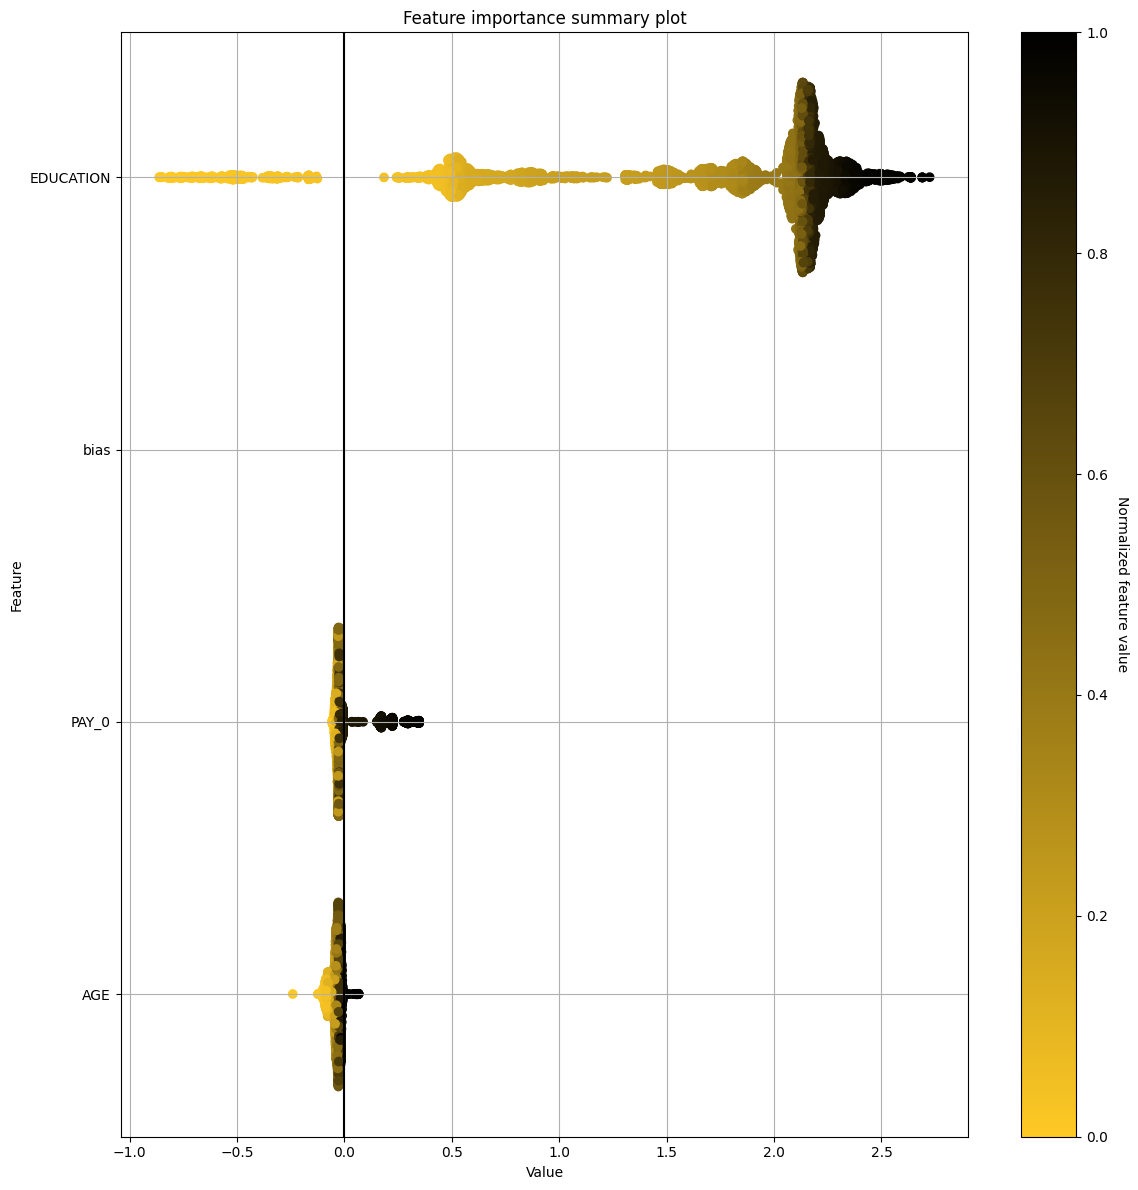

In [48]:
# plot summary shap for "PAY_0", "AGE and "EDUCATION"
result.plot(feature_names=["PAY_0", "AGE", "EDUCATION"])

### Save the explainer log and data

In [49]:
# save the explainer log
result.log(path="./summary-shapley-demo.log")

In [50]:
!head summary-shapley-demo.log

2023-03-13 00:10:38,853 INFO Summary Shapley explainer a38d3c78-087a-49c4-94cd-837e4f6bb08e/513ca372-eb5d-41df-8689-3585a7c3e547 raw MEANs (1)
2023-03-13 00:10:38,854 INFO Summary Shapley explainer a38d3c78-087a-49c4-94cd-837e4f6bb08e/513ca372-eb5d-41df-8689-3585a7c3e547 raw CONTRIBs (1)


In [51]:
# save the explainer data
result.zip(file_path="./summary-shapley-demo-archive.zip")

In [52]:
!unzip -l summary-shapley-demo-archive.zip

Archive:  summary-shapley-demo-archive.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     4013  2023-03-13 00:10   explainer_h2o_sonar_explainers_summary_shap_explainer_SummaryShapleyExplainer_513ca372-eb5d-41df-8689-3585a7c3e547/result_descriptor.json
   627902  2023-03-13 00:10   explainer_h2o_sonar_explainers_summary_shap_explainer_SummaryShapleyExplainer_513ca372-eb5d-41df-8689-3585a7c3e547/work/shapley-class-0.png
  2002376  2023-03-13 00:10   explainer_h2o_sonar_explainers_summary_shap_explainer_SummaryShapleyExplainer_513ca372-eb5d-41df-8689-3585a7c3e547/work/raw_shapley_contribs_class_0.jay
     1091  2023-03-13 00:10   explainer_h2o_sonar_explainers_summary_shap_explainer_SummaryShapleyExplainer_513ca372-eb5d-41df-8689-3585a7c3e547/work/raw_shapley_contribs_index.json
      141  2023-03-13 00:10   explainer_h2o_sonar_explainers_summary_shap_explainer_SummaryShapleyExplainer_513ca372-eb5d-41df-8689-3585a7c3e547/work/report.md
      110  2023-03-13 00